

# AMLS Intro ELEC0134 24/25 Assignment
## Task A_1: Baseline Support Vector Machine (SVM) on BreastMNIST Dataset

This script is the baseline Support Vector Machine for BreastMNIST.

It explores SVM based classifiers on the BreastMNIST dataset as follows:
- Step 1: non-kernel version
- Step 2: running tests with different kernels.

This uses the same model approach as Task 1 in Lab2 although using the MedMNIST data in place of the Iris dataset used in the lab example and some additional analytics e.g. confusion matrices.

It also uses the library AMLS_common that I have written to include all the common functions shared between multiple scenarios

## Import libraries
The required libraries for this part of the assessment are sklearn, numpy, medmnist and a locally developed common utility library

In [9]:
## first enable autoreload during development so latest (new) version local code library is reloaded on execution 
## can be commented out when local code development not happening to avoid overhead
%load_ext autoreload
%autoreload 2
    
## import sklearn elements as required
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## import numpy and matplot
import numpy as np
import matplotlib.pyplot as plt

## 07122024 removed MedMNIST library as all references in AMLS_common

## import locally defined common library including medMNIST load etc
import AMLS_common as ac

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set Hyperparameters

To configure SVM model only batch_size is set for this script. Gamma and C are used for kernel runs

In [10]:
## set hyperparameters if required
batch_size=128

## BreastMNIST: Load the Data
We load the dataset using the common loader library.

In [11]:
## Loading the BreastMNIST data file using common loader function in utility library
## set parameters for BreastMINST
data_flag  = 'breastmnist'
## run load process using batch size as set as hyperparameter
result_set = ac.medMNIST_load(data_flag,batch_size)

## check that the loader returned data correctly and then split out
## the result set returns three datasets in the one structure
if result_set != []:
    train_dataset = result_set[0]
    test_dataset  = result_set[1]
    val_dataset   = result_set[2]

Using downloaded and verified file: C:\Users\johnc\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\johnc\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\johnc\.medmnist\breastmnist.npz


## Convert the loaded datasets into SVM compatible form
Making sure the shapes and formats fit for SVM

In [12]:
# Convert dataset to NumPy arrays for SVM
x_train, y_train = ac.dataset_to_numpy(train_dataset)
x_test, y_test   = ac.dataset_to_numpy(test_dataset)

# Flatten images if they are not already flat 
# If X has shape (num_samples, height, width, channels), reshape to (num_samples, -1)
if len(x_train.shape) > 2:
    print("reshaping x_train")
    x_train = x_train.reshape(x_train.shape[0], -1)
if len(x_test.shape) > 2:
    print("reshaping x_test")
    x_test = x_test.reshape(x_test.shape[0], -1)

# make y the correct shape
y_train = y_train.reshape(-1)
y_test  = y_test.reshape(-1)

reshaping x_train
reshaping x_test


## Step 1: Support Vector Machine with no Kernel

Initial analysis including accuracy score and confusion matrix

Accuracy: 0.7948717948717948
Classification:
               precision    recall  f1-score   support

         0.0       0.92      0.26      0.41        42
         1.0       0.78      0.99      0.88       114

    accuracy                           0.79       156
   macro avg       0.85      0.63      0.64       156
weighted avg       0.82      0.79      0.75       156
 

Confusion Matrix:



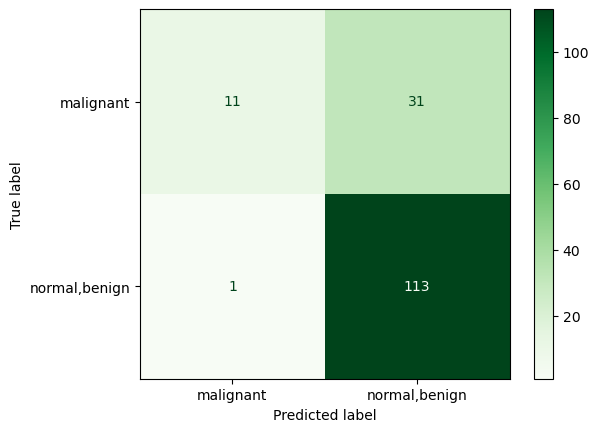

In [13]:
model = svm.SVC()
## train the model using x_train and y_train
model.fit(x_train,y_train)
y_pred = model.predict(x_test)    
## Scikit learn library results
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification:\n",classification_report(y_test,y_pred),"\n")
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels = ["malignant", "normal,benign"])
disp.plot(cmap='Greens')
plt.show()

## Step 2: Support Vector Machines (SVMs) With Kernels

Now implement SVM classifiers with various kernels including: linear, polynomial, and rbf.


SVC with linear kernel
Accuracy: 0.782051282051282
Classification:
               precision    recall  f1-score   support

         0.0       0.62      0.50      0.55        42
         1.0       0.83      0.89      0.86       114

    accuracy                           0.78       156
   macro avg       0.72      0.69      0.70       156
weighted avg       0.77      0.78      0.77       156

Confusion Matrix:



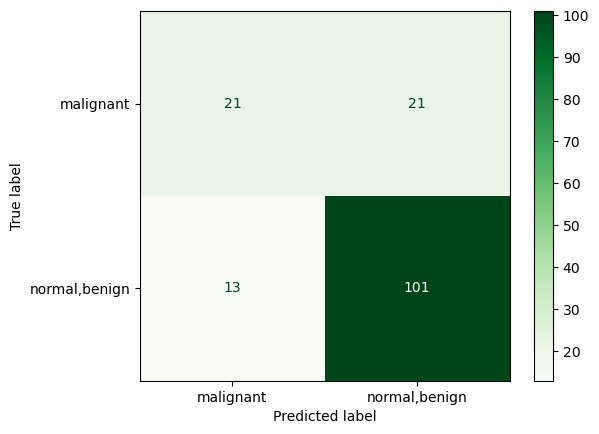



SVC with RBF kernel
Accuracy: 0.7564102564102564
Classification:
               precision    recall  f1-score   support

         0.0       0.75      0.14      0.24        42
         1.0       0.76      0.98      0.85       114

    accuracy                           0.76       156
   macro avg       0.75      0.56      0.55       156
weighted avg       0.75      0.76      0.69       156

Confusion Matrix:



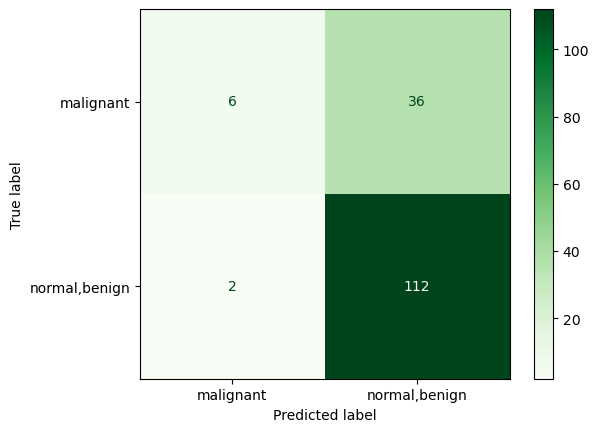



SVC with polynomial kernel
Accuracy: 0.7884615384615384
Classification:
               precision    recall  f1-score   support

         0.0       0.60      0.64      0.62        42
         1.0       0.86      0.84      0.85       114

    accuracy                           0.79       156
   macro avg       0.73      0.74      0.74       156
weighted avg       0.79      0.79      0.79       156

Confusion Matrix:



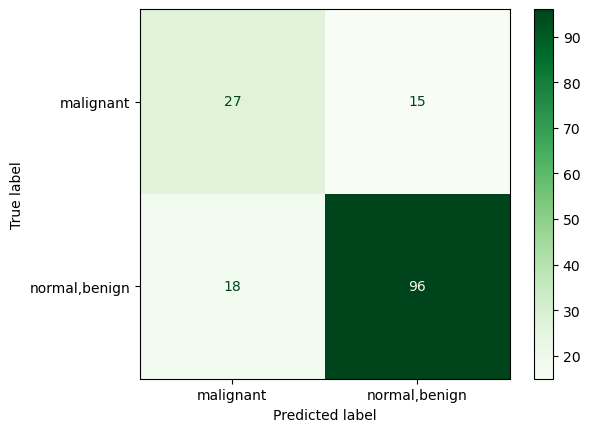

In [14]:
## set up alternative models
C      = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear',C=C),
          svm.SVC(kernel='rbf',gamma=0.7,C=C),
          svm.SVC(kernel='poly',degree=4,C=C))
## titles for each model
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial kernel')

## loop through executing each variant
countie = 0
for model in models:
    print(titles[countie])
    countie += 1
    model.fit(x_train, y_train)
    y_pred   = model.predict(x_test)
    print("Accuracy:",accuracy_score(y_test,y_pred))
    print("Classification:\n",classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    print("Confusion Matrix:\n")
    disp     = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels = ["malignant", "normal,benign"])
    disp.plot(cmap='Greens')
    plt.show()
    print("\n")

